# Waste Management using CNN Model

##### Dataset link: https://www.kaggle.com/datasets/techsash/waste-classification-data/data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [8]:
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path + '/*'):
  for file in tqdm(glob(category+'/*')):
    img_array = cv2.imread(file)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    x_data.append(img_array)
    y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:05<00:00, 2111.29it/s]


In [9]:
data.shape

(22564, 2)

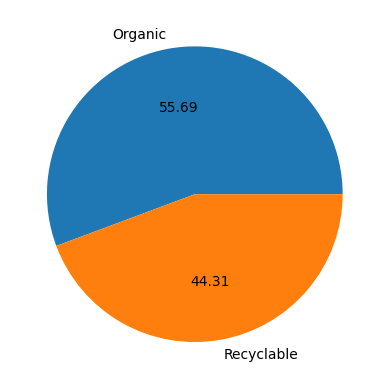

In [ ]:
colors = ["#a0d157","c48bb8"]
plt.pie(data.label.value_counts(), labels=["Organic","Recyclable"], autopct='%0.2f', colors = colors)
plt.show()